# Customer Churn Prediction
Develop a model to predict customer churn for a subscription based 
service or business. Use historical customer data, including features like 
usage behavior and customer demographics, and try algorithms like 
Logistic Regression, Random Forests, or Gradient Boosting to predict 
churn.

In [26]:
# Required Libraries 
# type: ignore

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

In [3]:
# Encode categorical variables
label_encoders = {}
for column in ['Geography', 'Gender']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [4]:
# Drop irrelevant columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], errors='ignore')

In [5]:
# Split features and target
X = data.drop(columns=['Exited'])
y = data['Exited']

In [6]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split the dataset for Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

In [9]:
# Training the models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_dtc = dtc.predict(X_test)

In [11]:
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)
gb_acc = accuracy_score(y_test, y_pred_gb)
dtc_acc = accuracy_score(y_test, y_pred_dtc)

In [12]:
log_reg_report = classification_report(y_test, y_pred_log_reg)
rf_report = classification_report(y_test, y_pred_rf)
gb_report = classification_report(y_test, y_pred_gb)
dtc_report = classification_report(y_test, y_pred_dtc)

In [21]:
print("Logistic Regression Results:\n", log_reg_report)

Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [22]:
print("Random Forest Result:\n", rf_report)

Random Forest Result:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [23]:
print("Gradient Boosting Result:\n", gb_report)

Gradient Boosting Result:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [24]:
print("Decision Tree Result:\n", dtc_report)

Decision Tree Result:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.45      0.53      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000



In [13]:
# Confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)

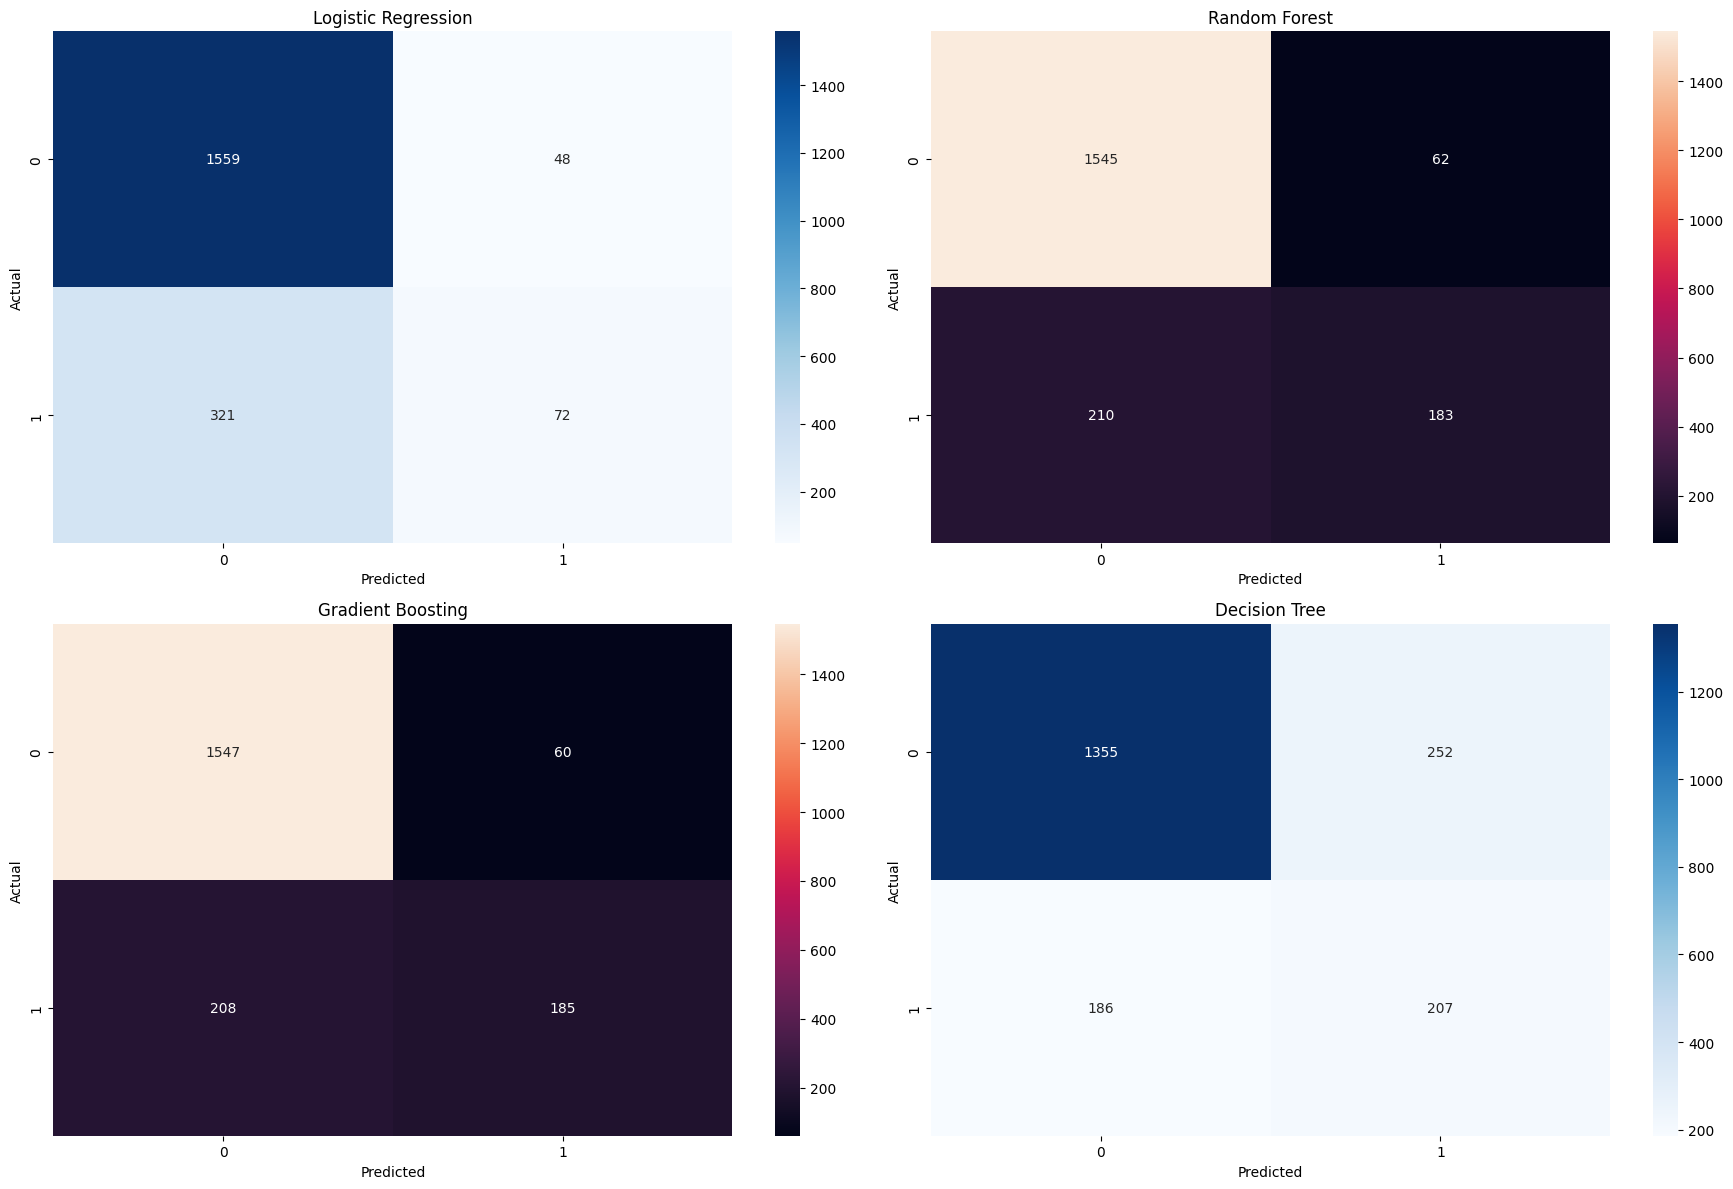

In [20]:
# Graphs
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')


sns.heatmap(cm_rf, annot=True, fmt='d', cmap='rocket', ax=axes[0,1])
axes[0,1].set_title('Random Forest')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='rocket', ax=axes[1,0])
axes[1,0].set_title('Gradient Boosting')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('Decision Tree')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

plt.tight_layout()
plt.show()